<a href="https://colab.research.google.com/github/MateoOrtiz001/BattleCity_RL_agent/blob/markov_analisis/p_cadenas_de_Markov_RL_agent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis de Cadena de Markov - BattleCity RL Agent

*  Mateo Sebastian Ortiz Higuera
*  Santiago Botero Daza
*  Juan Diego Gonzalez Layton

En este cuaderno realizamos un análisis de las cadenas de markov asociadas a las políticas aprendidas por agentes para el videojuego BattleCity.

El código del proyecto del agente se encuentra en este [repositorio](https://github.com/MateoOrtiz001/BattleCity_RL_agent.git).

Primero carguemos las librerias y el código necesario.

In [1]:
import os
import sys

# Clonar el repositorio si no existe
if not os.path.exists('BattleCity_RL_agent'):
    !git clone https://github.com/MateoOrtiz001/BattleCity_RL_agent.git

# Cambiar directorio de trabajo
if os.path.exists('BattleCity_RL_agent'):
    os.chdir('BattleCity_RL_agent')


Cloning into 'BattleCity_RL_agent'...
remote: Enumerating objects: 173, done.
remote: Counting objects: 100% (173/173), done.
remote: Compressing objects: 100% (137/137), done.
remote: Total 173 (delta 76), reused 119 (delta 33), pack-reused 0 (from 0)
Receiving objects: 100% (173/173), 1.25 MiB | 6.39 MiB/s, done.
Resolving deltas: 100% (76/76), done.


In [2]:
import pickle
import numpy as np
from collections import defaultdict, Counter as StdCounter
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Configurar paths para importar módulos del proyecto
project_dir = os.getcwd()
src_dir = os.path.join(project_dir, 'src')

if project_dir not in sys.path:
    sys.path.insert(0, project_dir)
if src_dir not in sys.path:
    sys.path.insert(0, src_dir)

# Importar módulos del proyecto
from src.training.environment import BattleCityEnvironment
from src.agents.qlearningAgents import BattleCityQAgent, ApproximateQAgent
from src.utils.util import Counter
from extract_markov_chain import MarkovChainExtractor

Ahora vamos a extraer una cadena de Markov para el modelo. Primero construimos una función para cargar el modelo:


In [3]:
def load_agent(filename):
    """Carga un agente desde archivo."""
    try:
        with open(filename, 'rb') as f:
            data = pickle.load(f)

        if 'weights' in data:
            agent = ApproximateQAgent(epsilon=0, alpha=0)
            agent.weights = Counter()
            agent.weights.update(data['weights'])
        else:
            agent = BattleCityQAgent(epsilon=0, alpha=0)
            if 'qValues' in data:
                agent.qValues = Counter()
                agent.qValues.update(data['qValues'])

        print(f" Agente cargado desde {filename}")
        return agent

    except Exception as e:
        print(f" Error al cargar agente: {e}")
        return None

Con esto, vamos a utilizar la clase `MarkovChainExtractor` para construir la cadena. Dicha clase fue implementada previamente y está guardada en el archivo *extract_markov_chain.py*, esto para facilitar y hacer este cuaderno más limpio.

Primero seleccionamos un agente entrenado con 10000 épocas, guardado en el repositorio. Seleccionamos el primer nivel y seleccionamos generar 1000 trayectorias.  

In [4]:
# Parámetros
AGENT_PATH = 'models/agent_episode_10000.pkl'
LEVEL = 1
EPISODES = 500

# Cargar agente
agent = load_agent(AGENT_PATH)

# Crear entorno
env = BattleCityEnvironment(level=LEVEL)
# Extraer cadena de Markov
cadena1 = MarkovChainExtractor(agent, env)
cadena1.collect_trajectories(num_episodes=EPISODES)

 Agente cargado desde models/agent_episode_10000.pkl
Recolectando 500 trayectorias...
  Episodios completados: 50/500
  Episodios completados: 100/500
  Episodios completados: 150/500
  Episodios completados: 200/500
  Episodios completados: 250/500
  Episodios completados: 300/500
  Episodios completados: 350/500
  Episodios completados: 400/500
  Episodios completados: 450/500
  Episodios completados: 500/500

  Recolectadas 500 trayectorias
  Estados únicos visitados: 698

  === RESULTADOS DE EPISODIOS (simulación real) ===
  Victorias:  347 (69.4%)
  Derrotas:   120 (24.0%)
  Timeout:    33 (6.6%)

  === ESTADOS TERMINALES ÚNICOS ===
  Estados de victoria:  14
  Estados de derrota:   57
  Estados de timeout:   15


Podemos ver un pequeño resumen de la cadena generada.

In [5]:
# Mostrar resumen
cadena1.print_summary()


ANÁLISIS DE CADENA DE MARKOV

 ESTADÍSTICAS GENERALES:
   Estados únicos: 698
   Estados terminales: 71
   - Victoria: 14
   - Derrota: 57
   Trayectorias recolectadas: 500

 ESTADOS MÁS VISITADOS:
   (3, ('lejos',), (3,), False, None, 'lejos'): 16482 visitas
   (3, ('lejos', 'lejos'), (3, 3), False, None, 'lejos'): 8765 visitas
   (1, ('lejos',), (3,), False, None, 'lejos'): 7830 visitas
   (1, ('lejos',), (2,), False, None, 'lejos'): 5756 visitas
   (3, ('lejos', 'lejos'), (1, 3), False, None, 'lejos'): 5403 visitas

 DISTRIBUCIÓN ESTACIONARIA (top 5):
   (3, ('lejos', 'lejos'), (3, 0), False, 'izquierda', 'cerca'): 0.6617
   (3, ('lejos', 'lejos'), (3, 0), False, None, 'lejos'): 0.0896
   (3, ('cerca', 'lejos'), (3, 0), False, 'izquierda', 'cerca'): 0.0633
   (3, ('lejos', 'lejos'), (3, 0), False, None, 'cerca'): 0.0339
   (3, ('lejos', 'cerca'), (3, 0), False, 'abajo', 'lejos'): 0.0318

 ACCIONES MÁS FRECUENTES:
   MOVE_RIGHT: 28893 (30.8%)
   MOVE_LEFT: 27141 (29.0%)
   MOVE_UP: 

## Experimentos

Vamos a tomar 3 modelos entrenados, el primero fue entrenado con 10000 épocas, el segundo con 50000 y el tercero con 100000. Vamos a extraer la cadena de Markov de cada uno simulando 2500 trayectorias.

In [6]:
# Creamos la primera cadena
cadena1 = MarkovChainExtractor(agent, env)
cadena1.collect_trajectories(num_episodes=1500)

# Creamos la segunda cadena
agent2 = load_agent('models/agent_episode_50000.pkl')
cadena2 = MarkovChainExtractor(agent2,env)
cadena2.collect_trajectories(num_episodes=1500)

# Creamos la tercera cadena
agent3 = load_agent('models/agent_episode_100000.pkl')
cadena3 = MarkovChainExtractor(agent3,env)
cadena3.collect_trajectories(num_episodes=1500)

Recolectando 1500 trayectorias...
  Episodios completados: 50/1500
  Episodios completados: 100/1500
  Episodios completados: 150/1500
  Episodios completados: 200/1500
  Episodios completados: 250/1500
  Episodios completados: 300/1500
  Episodios completados: 350/1500
  Episodios completados: 400/1500
  Episodios completados: 450/1500
  Episodios completados: 500/1500
  Episodios completados: 550/1500
  Episodios completados: 600/1500
  Episodios completados: 650/1500
  Episodios completados: 700/1500
  Episodios completados: 750/1500
  Episodios completados: 800/1500
  Episodios completados: 850/1500
  Episodios completados: 900/1500
  Episodios completados: 950/1500
  Episodios completados: 1000/1500
  Episodios completados: 1050/1500
  Episodios completados: 1100/1500
  Episodios completados: 1150/1500
  Episodios completados: 1200/1500
  Episodios completados: 1250/1500
  Episodios completados: 1300/1500
  Episodios completados: 1350/1500
  Episodios completados: 1400/1500
  Epis

Podemos ver la forma de los estados terminales: victoria o derrota.

In [7]:
winning_states = cadena1.winning_states
losing_states = cadena1.losing_states
print(f"\nCantidad de estados de victoria: {len(winning_states)}")
print(f"Cantidad de estados de derrota: {len(losing_states)}")
print("\nEjemplos de estados de victoria (primeros 3):")
for i, state in enumerate(list(winning_states)[:3]):
    print(f"  {i+1}. {state}")

print("\nEjemplos de estados de derrota (primeros 3):")
for i, state in enumerate(list(losing_states)[:3]):
    print(f"  {i+1}. {state}")



Cantidad de estados de victoria: 18
Cantidad de estados de derrota: 107

Ejemplos de estados de victoria (primeros 3):
  1. (0, (), (), False, None, 'lejos')
  2. (2, (), (), False, None, 'lejos')
  3. (1, ('cerca',), (0,), False, None, 'cerca')

Ejemplos de estados de derrota (primeros 3):
  1. (0, ('lejos', 'lejos'), (1, 3), False, 'arriba', 'lejos')
  2. (3, ('cerca', 'lejos'), (3, 3), True, None, 'cerca')
  3. (0, ('lejos', 'cerca'), (2, 1), False, 'izquierda', 'lejos')


Para continuar, obtengamos la matriz de transición.

In [8]:
cm1 = cadena1.get_transition_matrix()
cmt1 = cadena1.get_transition_matrix_with_timeout()
cm2 = cadena2.get_transition_matrix()
cmt2 = cadena2.get_transition_matrix_with_timeout()
cm3 = cadena3.get_transition_matrix()
cmt3 = cadena3.get_transition_matrix_with_timeout()

In [9]:
print(cm3[1])

[[0.84600518 0.04480169 0.         ... 0.         0.         0.        ]
 [0.45482866 0.30342679 0.00809969 ... 0.         0.         0.        ]
 [0.         0.         0.70893372 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.33333333 0.         0.        ]
 [0.         0.         0.         ... 0.         0.2        0.8       ]
 [0.         0.         0.         ... 0.         0.75       0.        ]]


Para calcular y responder algunas preguntas que pueden ser interesantes, vamos a calcular la matriz fundamental $M=(I-B)^{-1}$, con
$$P=\begin{bmatrix}R& 0 \\ A & B \end{bmatrix}$$
y $G=MA$.

Con esto, para cada estado podemos obtener el número esperado de visitas de estados y la probabilidad de visitas de estados.

La función retorna un diccionario con la información de:
-  Valor esperado de pasos hasta llegar a un estado absorvente (estado final).
-  Probabilidad de victoria partiendo desde este estado.
-  Probabilidad de derrota partiendo desde este estado.
-  Si es un estado de transición o recurrente.

además de la matriz $M$ y la matriz $G$.

In [10]:
def compute_fundamental_matrix_analysis(states, P, terminal_states, winning_states, lossing_states):

  state_to_idx = {s: i for i, s in enumerate(states)}
  n_states = len(states)

  sorted_terminal_states = sorted(list(terminal_states), key=lambda s: str(s))

  # Identificar índices
  absorbing_indices = [state_to_idx[s] for s in sorted_terminal_states if s in state_to_idx]
  transient_indices = [i for i in range(n_states) if i not in absorbing_indices]

  # Reordenar matriz para forma canónica
  # B: Transitorio -> Transitorio
  B = P[np.ix_(transient_indices, transient_indices)]

  # R: Transitorio -> Absorbente
  A = P[np.ix_(transient_indices, absorbing_indices)]

  # Calcular Matriz Fundamental M = (I - B)^-1
  I = np.eye(len(transient_indices))
  # Solucionar posibles errores numéricos:
  try:
      # Intentar resolver de forma más estable
      M = np.linalg.solve(I - B, np.eye(len(transient_indices)))
  except np.linalg.LinAlgError:
      # Si falla, usar pseudo-inversa
      M = np.linalg.pinv(I - B)


  # Calcular G = M * A (Probabilidad de absorción)
  G = M @ A

  # Calcular tiempos esperados hasta absorción (t = M * 1)
  t = M @ np.ones(len(transient_indices))

  # Mapear resultados de vuelta a los estados
  results = {}

  # Identificar cuáles de los estados absorbentes son de victoria
  winning_indices_in_absorbing = []
  losing_indices_in_absorbing = []
  other_indices_in_absorbing = []

  for idx, abs_idx in enumerate(absorbing_indices):
    state = states[abs_idx]
    if state in winning_states:
      winning_indices_in_absorbing.append(idx)
    elif state in losing_states:
      losing_indices_in_absorbing.append(idx)
    else:
      other_indices_in_absorbing.append(idx)

  # Agregar estados transitorios al resultado
  for i, trans_idx in enumerate(transient_indices):
    state = states[trans_idx]
    is_win = state in winning_states
    is_lose = state in losing_states
    is_other = not is_win and not is_lose

    # Probabilidad de victoria = suma de probs de absorción en estados ganadores
    win_prob = 0.0
    if winning_indices_in_absorbing:
      win_prob = np.sum(G[i, winning_indices_in_absorbing])
    los_prob = 0.0
    if losing_indices_in_absorbing:
      los_prob = np.sum(G[i, losing_indices_in_absorbing])
    other_prob = 0.0
    if other_indices_in_absorbing:
      other_prob = np.sum(G[i, other_indices_in_absorbing])


    results[state] = {
      'expected_steps_to_end': float(t[i]),    # ERRORES NUMÉRICOS
      'win_probability': float(win_prob),
      'lose_probability': float(los_prob),
      'other_probability': float(other_prob),
      'is_transient': True
    }

  # Agregar estados absorbentes al resultado
  for abs_idx in absorbing_indices:
    state = states[abs_idx]
    is_win = state in winning_states
    results[state] = {
      'expected_steps_to_end': 0.0,
      'win_probability': 1.0 if is_win else 0.0,
      'lose_probability': 1.0 if not is_win else 0.0,
      'other_probability': 1.0 if is_other else 0.0,
      'is_transient': False
      }

  print(f" Análisis completado para {len(transient_indices)} estados transitorios.")
  transient_states_list = [states[i] for i in transient_indices]
  absorbing_states_list = [states[i] for i in absorbing_indices]

  return results, M, G, transient_states_list, absorbing_states_list, other_indices_in_absorbing

Ahora calculemos la matriz fundamental $M$ de cada una de las cadenas de Markov.

In [11]:
r1 = compute_fundamental_matrix_analysis(cm1[0],cm1[1], cadena1.terminal_states, cadena1.winning_states, cadena1.losing_states)
r2 = compute_fundamental_matrix_analysis(cm2[0],cm2[1], cadena2.terminal_states, cadena2.winning_states, cadena2.losing_states)
r3 = compute_fundamental_matrix_analysis(cm3[0],cm3[1], cadena3.terminal_states, cadena3.winning_states, cadena3.losing_states)

ña = compute_fundamental_matrix_analysis(cmt1[0],cmt1[1], cadena1.terminal_states, cadena1.winning_states, cadena1.losing_states)
ñb = compute_fundamental_matrix_analysis(cmt2[0],cmt2[1], cadena2.terminal_states, cadena2.winning_states, cadena2.losing_states)
ñc = compute_fundamental_matrix_analysis(cmt3[0],cmt3[1], cadena3.terminal_states, cadena3.winning_states, cadena3.losing_states)


 Análisis completado para 965 estados transitorios.
 Análisis completado para 1139 estados transitorios.
 Análisis completado para 803 estados transitorios.
 Análisis completado para 966 estados transitorios.
 Análisis completado para 1140 estados transitorios.
 Análisis completado para 804 estados transitorios.


Con esta matriz vamos a ver la probabilidad de ganar un juego.
Primero veamos el estado inicial revisando el primer estado de una trayectoria.

In [12]:
estadoInicial = cadena3.trajectories[0][0]['state']
print(estadoInicial)

(3, ('lejos', 'lejos'), (3, 3), False, None, 'lejos')


In [13]:
def posicionEstado(estado, cadena, fundamental_matrix):
  state_to_idx = {s: i for i, s in enumerate(fundamental_matrix[0])}
  absorbing_indices = set(state_to_idx[s] for s in cadena.terminal_states if s in state_to_idx)
  transient_indices = [i for i in range(len(fundamental_matrix[0])) if i not in absorbing_indices]
  global_idx = state_to_idx[estado]

  matrix_idx = transient_indices.index(global_idx)
  return matrix_idx

# Updated helper function to get correct matrix indices based on state type
def get_matrix_indices_for_analysis(state, all_states_list, terminal_states):
    state_to_global_idx = {s: i for i, s in enumerate(all_states_list)}
    global_idx = state_to_global_idx[state]
    sorted_terminal_states = sorted(list(terminal_states), key=lambda s: str(s))
    absorbing_global_indices = [state_to_global_idx[s] for s in sorted_terminal_states if s in state_to_global_idx]
    transient_global_indices = [idx for idx in range(len(all_states_list)) if idx not in absorbing_global_indices]

    if global_idx in transient_global_indices:
        return transient_global_indices.index(global_idx), "transient"
    elif global_idx in absorbing_global_indices:
        return absorbing_global_indices.index(global_idx), "absorbing"
    else:
        return None, None

Con esto veamos el valor esperado de visitas de este primer estado en cada una de las cadenas.

In [14]:
matrix_idx = posicionEstado(estadoInicial, cadena3, r3)
expected_visits1 = r1[1][matrix_idx, matrix_idx]
expected_visits2 = r2[1][matrix_idx, matrix_idx]
expected_visits3 = r3[1][matrix_idx, matrix_idx]
print(f"Número promedio de visitas en el estado inicial:\n {expected_visits1:.4f}\n {expected_visits2:.4f}\n {expected_visits3:.4f}\n")

Número promedio de visitas en el estado inicial:
 16.7419
 63.9560
 15.1779



Podemos observar que, mientras que con el modelo con un tiempo de entrenamiento intermedio el número promedio en el que obtenemos un estado inicial es bastante alto, para los otros dos parece que explora más estados intermedios al tener una esperanza más pequeña.

Con esto ahora veamos la probabilidad de llegar a un estado de victoria partiendo desde el estado inicial.

In [15]:
probVic1 = r1[0][estadoInicial]['win_probability']
probVic2 = r2[0][estadoInicial]['win_probability']
probVic3 = r3[0][estadoInicial]['win_probability']
print("Probabilidad de victoria desde el estado inicial")
print(f" Modelo 1: {probVic1:.4f}\n Modelo 2: {probVic2:.4f}\n Modelo 3: {probVic3:.4f}")

Probabilidad de victoria desde el estado inicial
 Modelo 1: 0.7894
 Modelo 2: 0.7419
 Modelo 3: 0.8254


In [16]:
probDer1 = r1[0][estadoInicial]['lose_probability']
probDer2 = r2[0][estadoInicial]['lose_probability']
probDer3 = r3[0][estadoInicial]['lose_probability']
print("Probabilidad de derrota desde el estado inicial")
print(f" Modelo 1: {probDer1:.4f}\n Modelo 2: {probDer2:.4f}\n Modelo 3: {probDer3:.4f}")

Probabilidad de derrota desde el estado inicial
 Modelo 1: 0.2066
 Modelo 2: 0.1323
 Modelo 3: 0.1279


Con esto, podemos ver también el número esperado de pasos hasta llegar a victoria o derrota.

In [17]:
espTer1 = ña[0][estadoInicial]['expected_steps_to_end']
espTer2 = ñb[0][estadoInicial]['expected_steps_to_end']
espTer3 = ñc[0][estadoInicial]['expected_steps_to_end']
print("Valor esperado de número de pasos hasta llegar a un estado final, partiendo desde el estado inicial")
print(f" Modelo 1: {espTer1:.4f}\n Modelo 2: {espTer2:.4f}\n Modelo 3: {espTer3:.4f}")

Valor esperado de número de pasos hasta llegar a un estado final, partiendo desde el estado inicial
 Modelo 1: 22.6055
 Modelo 2: 82.9267
 Modelo 3: 22.3279


De estos resultados podemos inferir que existen estados absorventes diferentes a los estados finales de victoria/derrota. Calculemos la probabilida de llegar a estos estados y después veamos la forma de alguno de ellos.

In [18]:
probOtr1 = r1[0][estadoInicial]['other_probability']
probOtr2 = r2[0][estadoInicial]['other_probability']
probOtr3 = r3[0][estadoInicial]['other_probability']
print("Probabilidad de estar en un estado absorvente diferente a victoria o derrota desde el estado inicial")
print(f" Modelo 1: {probOtr1:.4f}\n Modelo 2: {probOtr2:.4f}\n Modelo 3: {probOtr3:.4f}")

Probabilidad de estar en un estado absorvente diferente a victoria o derrota desde el estado inicial
 Modelo 1: 0.0000
 Modelo 2: 0.0775
 Modelo 3: 0.0426


Lo que podemos deducir de estos resultados, es que los estados recurrentes diferentes a los estados de victoria y derrota son estados en donde, en las simulaciones de las partidas, se termina el tiempo de juego.


Finalmente podemos graficar las probabilidades desde el estado inicial.

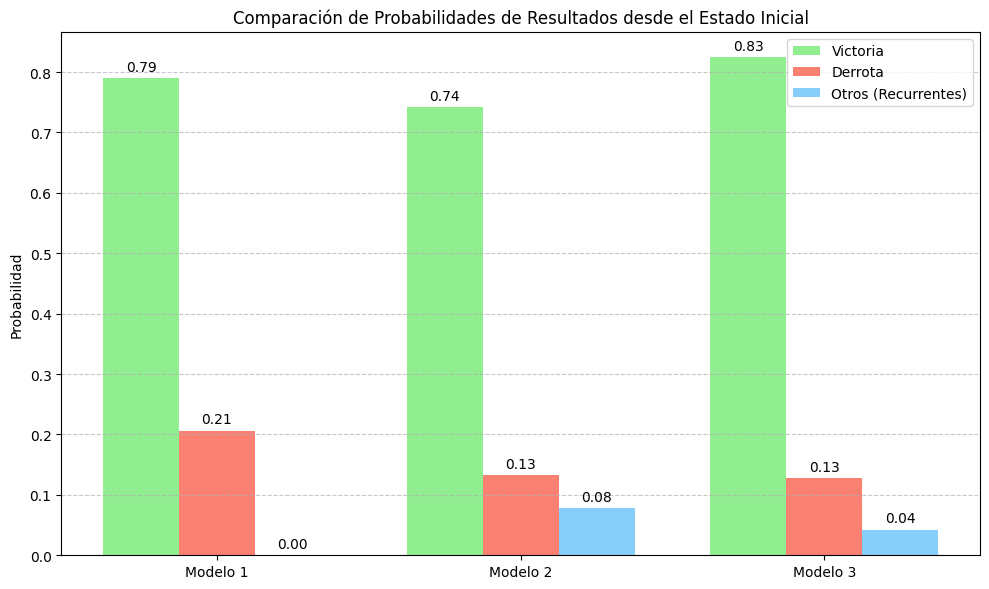

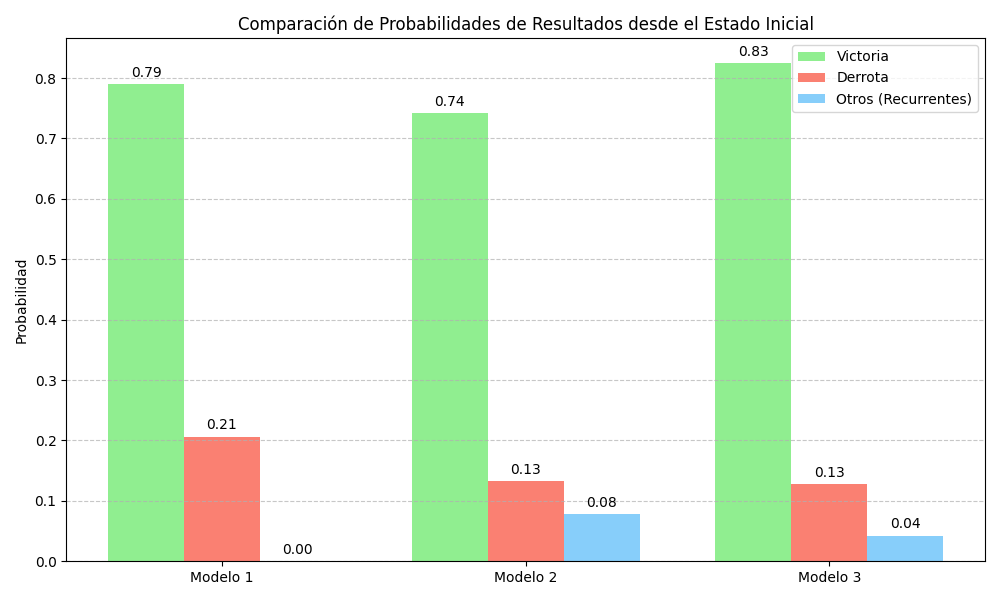

In [21]:
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Image, display

# Datos de probabilidades
models = ['Modelo 1', 'Modelo 2', 'Modelo 3']
prob_victoria = [probVic1, probVic2, probVic3]
prob_derrota = [probDer1, probDer2, probDer3]
prob_otros = [probOtr1, probOtr2, probOtr3]

x = np.arange(len(models))  # Las etiquetas de los modelos
width = 0.25  # Ancho de las barras

fig, ax = plt.subplots(figsize=(10, 6))

rects1 = ax.bar(x - width, prob_victoria, width, label='Victoria', color='lightgreen')
rects2 = ax.bar(x, prob_derrota, width, label='Derrota', color='salmon')
rects3 = ax.bar(x + width, prob_otros, width, label='Otros (Recurrentes)', color='lightskyblue')

# Añadir etiquetas, título y leyenda
ax.set_ylabel('Probabilidad')
ax.set_title('Comparación de Probabilidades de Resultados desde el Estado Inicial')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

# Función para añadir etiquetas de valor en las barras
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 puntos de offset vertical
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Guardar la figura y luego mostrarla
plot_filename = "probabilidad_resultados.png"
plt.savefig(plot_filename)
plt.show()
display(Image(filename=plot_filename))

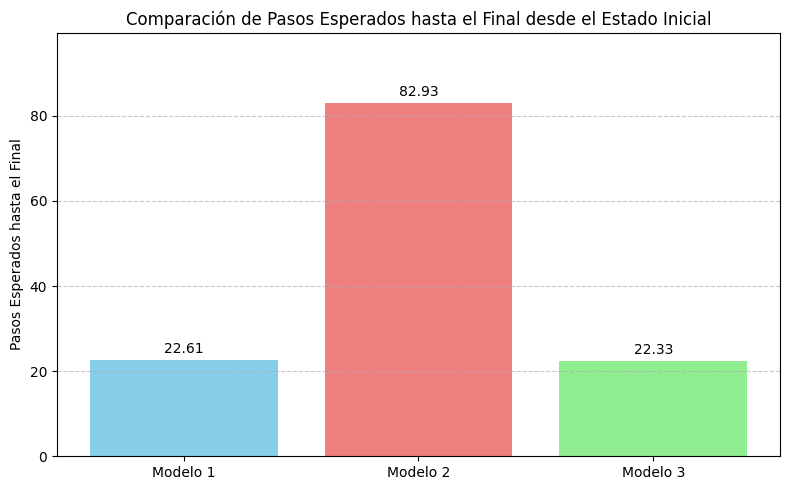

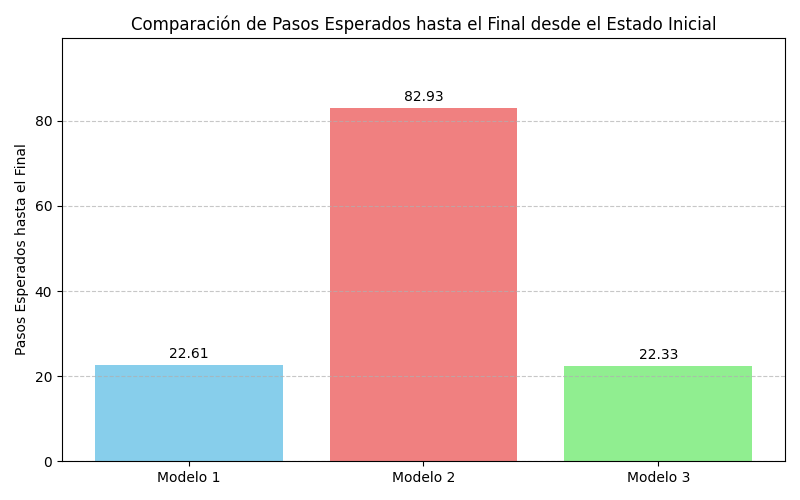

In [22]:
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Image, display

# Datos de los pasos esperados hasta el final
models = ['Modelo 1', 'Modelo 2', 'Modelo 3']
expected_steps_to_end = [espTer1, espTer2, espTer3]

x = np.arange(len(models))  # Las etiquetas de los modelos

fig, ax = plt.subplots(figsize=(8, 5))

# Crear el gráfico de barras
rects = ax.bar(x, expected_steps_to_end, color=['skyblue', 'lightcoral', 'lightgreen'])

# Añadir etiquetas, título y leyenda
ax.set_ylabel('Pasos Esperados hasta el Final')
ax.set_title('Comparación de Pasos Esperados hasta el Final desde el Estado Inicial')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.set_ylim(0, max(expected_steps_to_end) * 1.2) # Ajustar límite y para mejor visualización

# Función para añadir etiquetas de valor en las barras
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 puntos de offset vertical
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects)

fig.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Guardar la figura y luego mostrarla
plot_filename_steps = "expected_steps_to_end_comparison.png"
plt.savefig(plot_filename_steps)
plt.show()
display(Image(filename=plot_filename_steps))


In [29]:

def compute_spectral_analysis(states, P, terminal_states):
    """
    Calcula propiedades espectrales de la cadena (Tiempos de Mezcla/Relajación).
    Para cadenas absorbentes, analiza el autovalor más grande de la submatriz Q.
    """
    print("Calculando Análisis Espectral (Tiempos de Relajación)...")

    state_to_idx = {s: i for i, s in enumerate(states)}
    n_states = len(states)
    absorbing_indices = [state_to_idx[s] for s in terminal_states if s in state_to_idx]
    transient_indices = [i for i in range(n_states) if i not in absorbing_indices]

    if not transient_indices:
        return None

    # Submatriz Q (Transitorio -> Transitorio)
    Q = P[np.ix_(transient_indices, transient_indices)]

    try:
        # Calcular autovalores
        eigenvalues = np.linalg.eigvals(Q)
        # Ordenar por magnitud (módulo)
        eigenvalues = sorted(eigenvalues, key=lambda x: abs(x), reverse=True)

        # Radio espectral (rho)
        rho = abs(eigenvalues[0])

        # Tiempo de relajación (tau)
        # tau = -1 / ln(rho)
        # Representa el tiempo característico para que la distribución decaiga hacia la absorción
        if rho < 1.0:
            relaxation_time = -1.0 / np.log(rho)
        else:
            relaxation_time = float('inf')

        # Spectral Gap (Brecha espectral) = 1 - rho
        spectral_gap = 1.0 - rho

        results = {
            'spectral_radius': float(rho),
            'relaxation_time': float(relaxation_time),
            'spectral_gap': float(spectral_gap),
            'top_3_eigenvalues': [complex(e) for e in eigenvalues[:3]]
        }

        print(f" Radio espectral (rho): {rho:.4f}")
        print(f" Tiempo de relajación: {relaxation_time:.2f} pasos")
        return results

    except Exception as e:
        print(f" Error en análisis espectral: {e}")
        return None


Ahora vamos a calcular los tiempos de mezcla y de relajación de la cadena:

In [31]:
print("\nAnálisis Espectral para el Modelo 1")
spectral_analysis1 = compute_spectral_analysis(cmt1[0], cmt1[1], ña[4])
print(spectral_analysis1)

print("\nAnálisis Espectral para el Modelo 2")
spectral_analysis2 = compute_spectral_analysis(cmt2[0], cmt2[1], ñb[4])
print(spectral_analysis2)

print("\nAnálisis Espectral para el Modelo 3")
spectral_analysis3 = compute_spectral_analysis(cmt3[0], cmt3[1], ñc[4])
print(spectral_analysis3)


Análisis Espectral para el Modelo 1
Calculando Análisis Espectral (Tiempos de Relajación)...
 Radio espectral (rho): 1.0000
 Tiempo de relajación: inf pasos
{'spectral_radius': 1.0, 'relaxation_time': inf, 'spectral_gap': 0.0, 'top_3_eigenvalues': [(1+0j), (0.9910154190099972+0j), (0.9909975498803665+0j)]}

Análisis Espectral para el Modelo 2
Calculando Análisis Espectral (Tiempos de Relajación)...
 Radio espectral (rho): 1.0000
 Tiempo de relajación: inf pasos
{'spectral_radius': 1.0, 'relaxation_time': inf, 'spectral_gap': 0.0, 'top_3_eigenvalues': [(1+0j), (0.9953052682838884+0j), (-0.9905660377358487+0j)]}

Análisis Espectral para el Modelo 3
Calculando Análisis Espectral (Tiempos de Relajación)...
 Radio espectral (rho): 1.0000
 Tiempo de relajación: inf pasos
{'spectral_radius': 1.0, 'relaxation_time': inf, 'spectral_gap': 0.0, 'top_3_eigenvalues': [(1+0j), (0.9927730952648013+0j), (0.9920795244189171+0j)]}


In [25]:
def compute_risk_analysis(states, P, R_matrix):
    risk_stats = {}

    for i, state in enumerate(states):
        # Probabilidades de transición desde i
        probs = P[i]
        # Recompensas hacia cada estado j
        rewards = R_matrix[i]

        # Esperanza E[R] = sum(p_j * r_j)
        expected_reward = np.sum(probs * rewards)

        # Varianza Var[R] = sum(p_j * (r_j - E[R])^2)
        variance_reward = np.sum(probs * (rewards - expected_reward)**2)

        risk_stats[state] = {
            'expected_reward': float(expected_reward),
            'reward_variance': float(variance_reward),
            'reward_std': float(np.sqrt(variance_reward))
        }

    return risk_stats



asdf

In [26]:
reward1 = cadena1.get_reward_matrix()
reward2 = cadena2.get_reward_matrix()
reward3 = cadena3.get_reward_matrix()

risk1 = compute_risk_analysis(cm1[0],cm1[1],reward1[1])
risk2 = compute_risk_analysis(cm2[0],cm2[1],reward2[1])
risk3 = compute_risk_analysis(cm3[0],cm3[1],reward3[1])

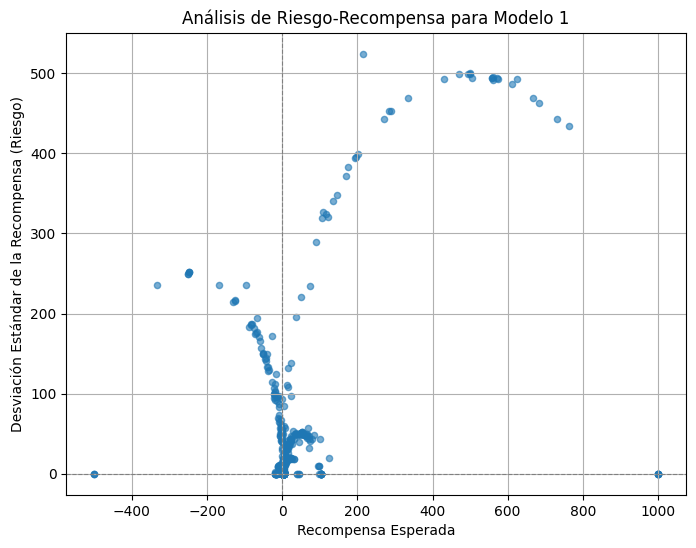

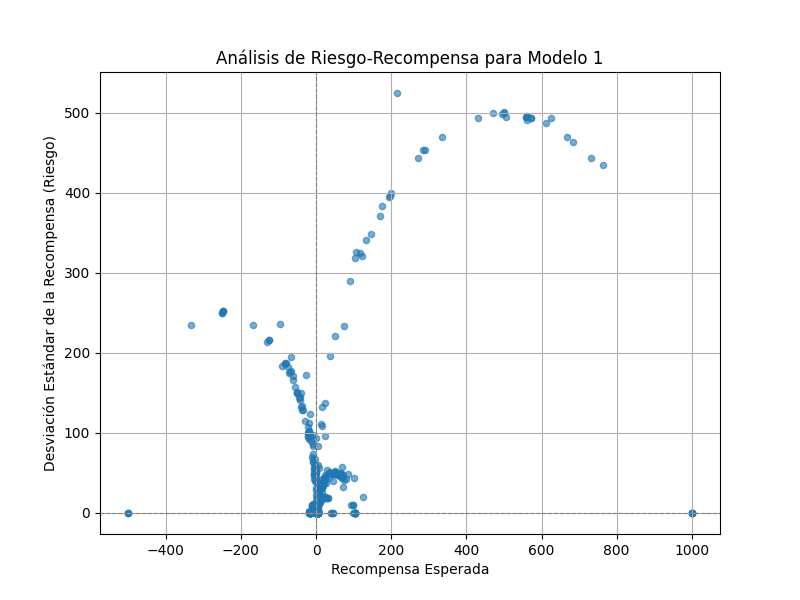

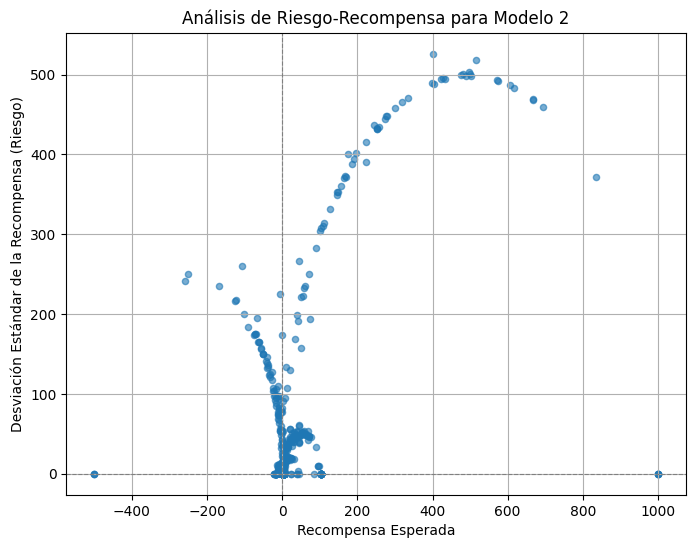

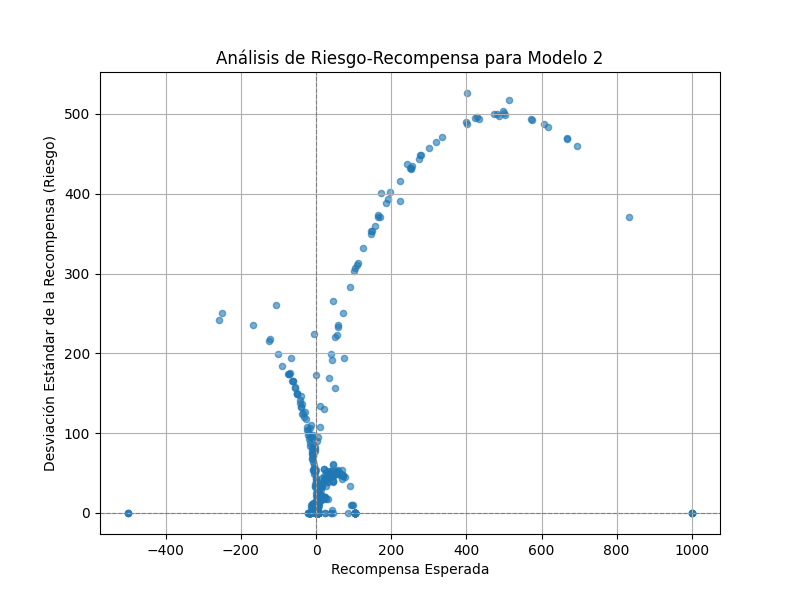

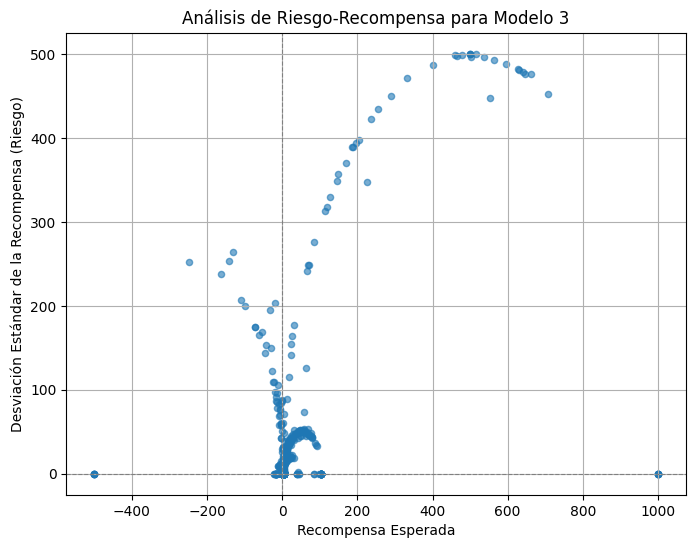

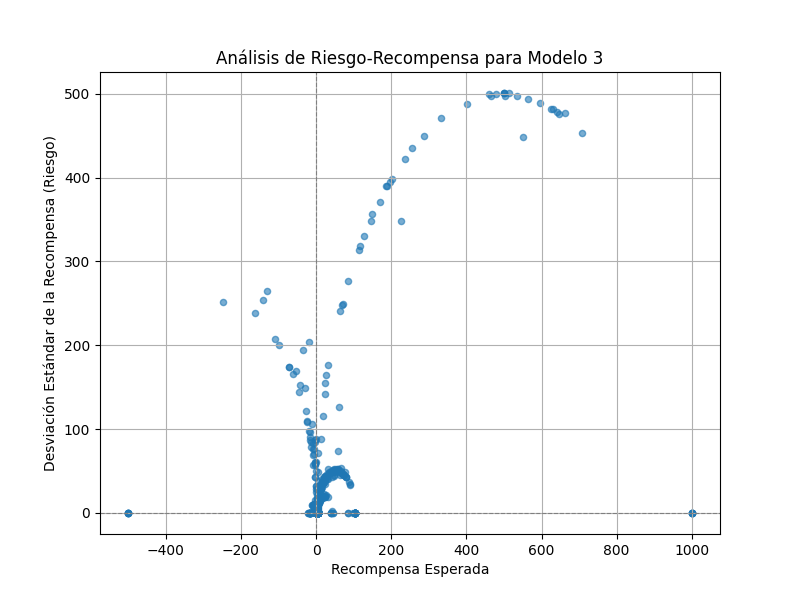

In [27]:
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Image, display

def plot_risk_reward(risk_data, title, filename):
    expected_rewards = [data['expected_reward'] for data in risk_data.values()]
    reward_stds = [data['reward_std'] for data in risk_data.values()]

    plt.figure(figsize=(8, 6))
    plt.scatter(expected_rewards, reward_stds, alpha=0.6, s=20)
    plt.title(title)
    plt.xlabel('Recompensa Esperada')
    plt.ylabel('Desviación Estándar de la Recompensa (Riesgo)')
    plt.grid(True)
    plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)
    plt.axvline(0, color='gray', linestyle='--', linewidth=0.8)
    plt.savefig(filename)
    plt.show()
    display(Image(filename=filename))

# Graficar para el Modelo 1
plot_risk_reward(risk1, 'Análisis de Riesgo-Recompensa para Modelo 1', 'risk_reward_model1.png')

# Graficar para el Modelo 2
plot_risk_reward(risk2, 'Análisis de Riesgo-Recompensa para Modelo 2', 'risk_reward_model2.png')

# Graficar para el Modelo 3
plot_risk_reward(risk3, 'Análisis de Riesgo-Recompensa para Modelo 3', 'risk_reward_model3.png')

Veamos la recompensa esperada y la varianza de dicha recompenza para el estado inicial.

In [28]:
riesgo1 = risk1[estadoInicial]
riesgo2 = risk2[estadoInicial]
riesgo3 = risk3[estadoInicial]
print(f"Información del primer estado en la cadena 1:")
print(f" Recompensa Esperada:{riesgo1['expected_reward']:.3f}")
print(f" Varianza de la recompensa:{riesgo1['reward_variance']:.3f}")
print(f" Desviación estandar de la recompensa:{riesgo1['reward_std']:.3f}")
print(f"Información del primer estado en la cadena 2:")
print(f" Recompensa Esperada:{riesgo2['expected_reward']:.3f}")
print(f" Varianza de la recompensa:{riesgo2['reward_variance']:.3f}")
print(f" Desviación estandar de la recompensa:{riesgo2['reward_std']:.3f}")
print(f"Información del primer estado en la cadena 3:")
print(f" Recompensa Esperada:{riesgo3['expected_reward']:.3f}")
print(f" Varianza de la recompensa:{riesgo3['reward_variance']:.3f}")
print(f" Desviación estandar de la recompensa:{riesgo3['reward_std']:.3f}")

Información del primer estado en la cadena 1:
 Recompensa Esperada:3.870
 Varianza de la recompensa:0.965
 Desviación estandar de la recompensa:0.982
Información del primer estado en la cadena 2:
 Recompensa Esperada:4.259
 Varianza de la recompensa:0.215
 Desviación estandar de la recompensa:0.463
Información del primer estado en la cadena 3:
 Recompensa Esperada:3.958
 Varianza de la recompensa:0.982
 Desviación estandar de la recompensa:0.991
